In [8]:
# importamos las librerias necesarias
import sys
assert sys.version_info >= (3, 5)
import os
import pandas as pd


In [44]:
DATA_PATH = "../data"
def load_data_prep(data_path=DATA_PATH):
    csv_path = os.path.join(data_path, "train_set_limpio.csv")
    return pd.read_csv(csv_path)

In [45]:
train_set_ = load_data_prep()

In [46]:
train_set_.drop(['cod', 'label'], axis=1).columns

Index(['afsl_ad', 'afsl_area_of_end_region_1', 'afsl_area_of_end_region_2',
       'afsl_branch_volume', 'afsl_curl', 'afsl_diameter', 'afsl_dti_fa',
       'afsl_elongation', 'afsl_irregularity',
       'afsl_irregularity_of_end_region_1',
       ...
       'ufsr_radius_of_end_region_1', 'ufsr_radius_of_end_region_2', 'ufsr_rd',
       'ufsr_rdi', 'ufsr_span', 'ufsr_total_area_of_end_regions',
       'ufsr_total_radius_of_end_regions', 'ufsr_total_surface_area',
       'ufsr_trunk_volume', 'ufsr_volume'],
      dtype='object', length=290)

In [47]:
X = train_set_.drop(['cod', 'label'], axis=1).values
y = train_set_['label']

In [48]:
X.shape, y.shape

((52, 290), (52,))

In [49]:
# seleccion exhaustiva de variables
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler 


In [50]:
efs = EFS(RandomForestClassifier(),
          min_features=28,
          max_features=32,
          scoring='roc_auc',
          print_progress=True,
          cv=5)

efs1 = EFS(KNeighborsClassifier(n_neighbors=3), 
          min_features=28,
          max_features=32,
          scoring='roc_auc',
          print_progress=True,
          cv=5)
model = RandomForestClassifier(n_estimators=290)


In [89]:
X

array([[1.19677e+00, 1.27502e+03, 1.94876e+03, ..., 2.87163e+04,
        1.76172e+04, 1.77905e+04],
       [1.07700e+00, 1.19863e+03, 1.58740e+03, ..., 2.34419e+04,
        1.41339e+04, 1.46823e+04],
       [1.22377e+00, 1.46695e+03, 1.89196e+03, ..., 3.15248e+04,
        1.39116e+04, 1.84358e+04],
       ...,
       [1.36699e+00, 6.56114e+02, 9.71441e+02, ..., 4.16809e+04,
        1.75437e+04, 2.40050e+04],
       [1.16066e+00, 1.18492e+03, 2.19064e+03, ..., 3.15062e+04,
        1.44972e+04, 1.68063e+04],
       [1.21159e+00, 1.25739e+03, 1.88902e+03, ..., 2.32421e+04,
        6.28695e+03, 1.31938e+04]])

In [ ]:
rd_rfc = make_pipeline(StandardScaler(), model)
rd_rfc.fit(X, y) 
feature_importances = rd_rfc.best_estimator_._final_estimator.feature_importances_


In [51]:
pipelines = {
#    'rd_efsrfc':make_pipeline(StandardScaler(), efs()),
#    'rd_efsknc':make_pipeline(StandardScaler(), efs1()),
    'rd_rfc':make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=290)),
}

In [52]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = pipeline.fit(X, y)
    fit_models[algo] = model

In [ ]:
feature_importances = fit_models['rd_rfc'].best_estimator_._final_estimator.feature_importances_

In [ ]:

efs = efs.fit(X, y)

selected_features = train_set_.columns[list(efs.best_idx_)]
print(selected_features)

print(efs.best_score_)

In [82]:
from sklearn.ensemble import RandomForestClassifier
scaler = StandardScaler() 
escalado = scaler.fit_transform(X)
model = RandomForestClassifier(n_estimators=290)
model.fit(escalado, y)
importances = model.feature_importances_
final_df = pd.DataFrame({'Features': train_set_.drop(['cod', 'label'], axis=1).columns, 'Importance': importances})
final_df.set_index('Features', inplace=True)


In [83]:
final_df.sort_values(by='Importance', ascending=False, inplace=True)

<Axes: xlabel='Features'>

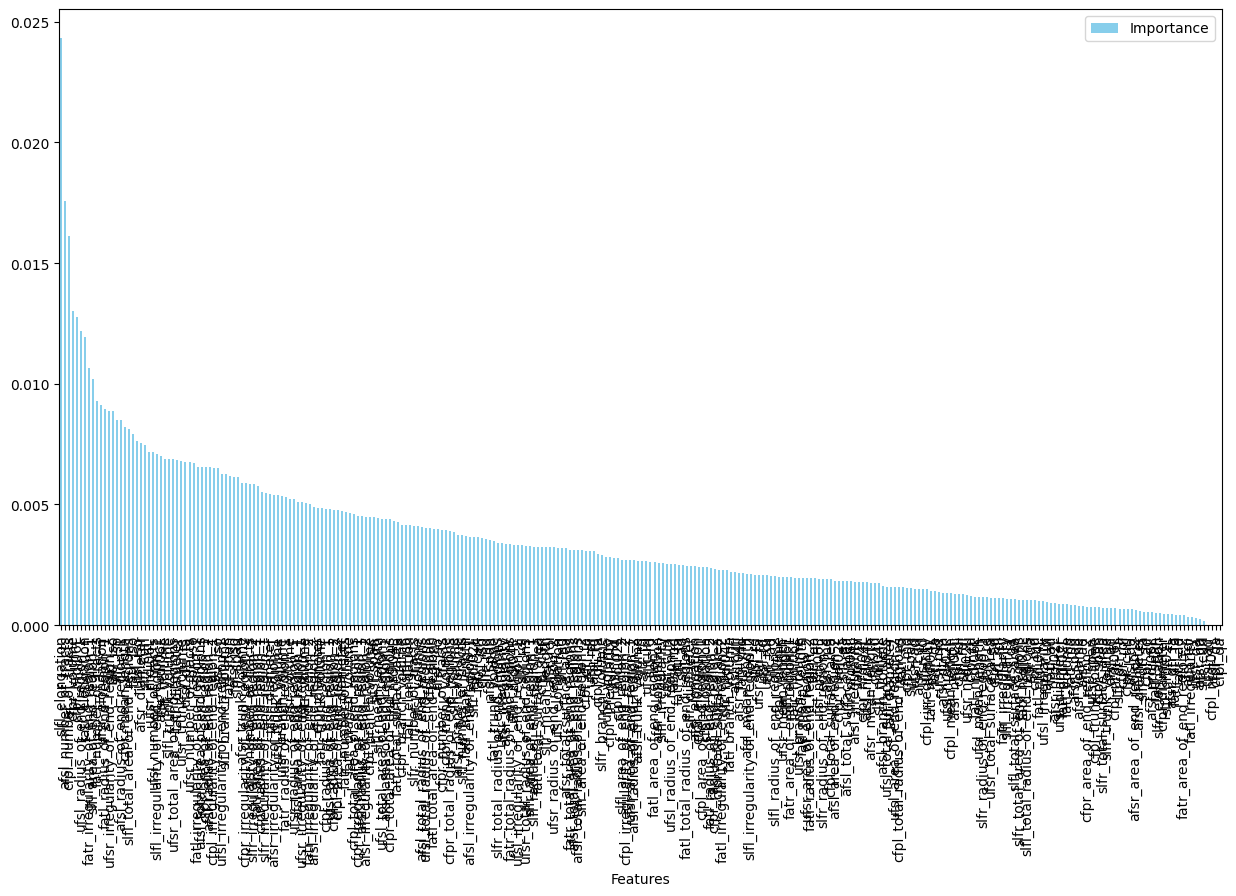

In [86]:
final_df.plot.bar( color='skyblue', figsize=(15, 8))

In [88]:
final_df.to_csv('../data/feature_importances.csv')

In [40]:
final_df.columns

Index(['Features'], dtype='object')

In [ ]:
X = StandardScaler().fit_transform(X) # lo escaleo

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

logistic = LogisticRegression(C=0.01, penalty='l1', solver='liblinear', random_state=42).fit(X, y)
model = SelectFromModel(logistic, prefit=True)

features_idx = model.get_support()
features_name = train_set_.drop(['cod', 'label'], axis=1).columns[features_idx]

X_new = model.transform(X)


SelectFromModel(estimator=LogisticRegression(C=0.01, penalty='l1',
                                             random_state=42,
                                             solver='liblinear'),
                prefit=True)

In [99]:
features_name

Index(['afsl_branch_volume', 'afsl_number_of_tracts',
       'afsl_total_surface_area', 'afsl_trunk_volume',
       'afsr_total_area_of_end_regions', 'afsr_total_surface_area',
       'cfpl_branch_volume', 'cfpl_number_of_tracts', 'cfpl_trunk_volume',
       'cfpr_branch_volume', 'cfpr_number_of_tracts',
       'cfpr_total_surface_area', 'cfpr_volume', 'fatl_branch_volume',
       'fatl_number_of_tracts', 'fatl_total_surface_area', 'fatl_trunk_volume',
       'fatr_branch_volume', 'fatr_number_of_tracts',
       'fatr_total_surface_area', 'fatr_volume', 'slfl_area_of_end_region_1',
       'slfl_branch_volume', 'slfl_number_of_tracts',
       'slfl_total_area_of_end_regions', 'slfl_total_surface_area',
       'slfl_trunk_volume', 'slfr_area_of_end_region_2', 'slfr_branch_volume',
       'slfr_number_of_tracts', 'slfr_trunk_volume', 'slfr_volume',
       'ufsl_branch_volume', 'ufsl_number_of_tracts',
       'ufsl_total_surface_area', 'ufsl_trunk_volume', 'ufsr_branch_volume',
       'ufs

In [98]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

efs = EFS(lr, 
          min_features=33,
          max_features=40,
          scoring='neg_mean_squared_error',
          cv=10)

efs.fit(X, y)

print('Best MSE score: %.2f' % efs.best_score_ * (-1))
print('Best subset:', efs.best_idx_)

c:\hcgalvan\Repositorios\hcgalvan_project\venv\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
1 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\hcgalvan\Repositorios\hcgalvan_project\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\hcgalvan\Repositorios\hcgalvan_project\venv\lib\site-packages\sklearn\linear_model\_base.py", line 699, in fit
    self.coef_, _, self.rank_, self.singular_ = linalg.lstsq(X, y)
  File "c:\hcgalvan\Repositorios\hcgalvan_project\venv\lib\site-packages\scipy\

KeyboardInterrupt: 

In [ ]:
# selección de features
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

efs = EFS(lr, 
          min_features=33,
          max_features=40,
          scoring='r2',
          cv=10)

efs.fit(X, y)

print('Best R2 score: %.2f' % efs.best_score_ * (-1))
print('Best subset:', efs.best_idx_)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS


knn = KNeighborsClassifier(n_neighbors=3)

efs1 = EFS(knn, 
          min_features=28,
          max_features=32,
          scoring='roc_auc',
          print_progress=True,
          cv=2)

efs1 = efs1.fit(X, y)

print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)
print('Best subset (corresponding names):', efs1.best_feature_names_)